<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/Case_study_modelalgorithm_Shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model prediction for a company to know how many of their customers wil leave or be part of the company. Finding the best model that finds the people leaving the company.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn import tree

EDA

In [2]:
df1 = pd.read_csv("/content/Training_data.csv")
df2 = pd.read_csv("/content/Testing_data.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(5634, 21)
(1409, 21)


In [4]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [6]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [8]:
df1['TotalCharges'].unique()

array(['700.45', '961.4', '5581.05', ..., '1322.85', '5555.3', '1381.8'],
      dtype=object)

In [9]:
df1['TotalCharges'] = df1['TotalCharges'].replace(' ', np.nan)
df1['TotalCharges'] = df1['TotalCharges'].astype(np.float64)

In [10]:
df1['OnlineSecurity'].unique()

array(['No internet service', 'No', nan, 'Yes'], dtype=object)

In [11]:
df1.duplicated().sum()

np.int64(0)

In [12]:
df1.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [13]:
df1 = df1.drop(columns=['customerID'],axis =1)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

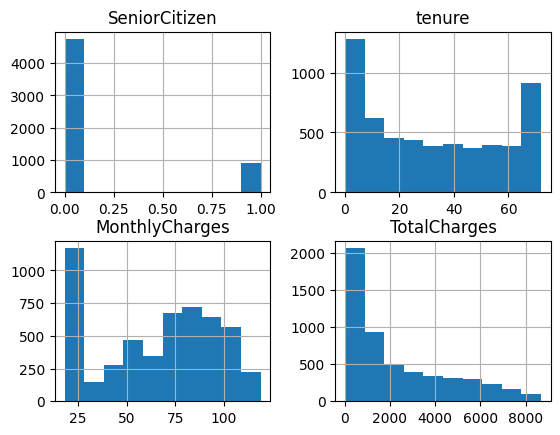

In [14]:
df1.hist()

In [15]:
df1['gender'] = df1['gender'].fillna(df1['gender'].mode()[0])

In [16]:
df1['TotalCharges'] = df1['TotalCharges'].fillna(df1['TotalCharges'].median())
df1['MonthlyCharges'] = df1['MonthlyCharges'].fillna(df1['MonthlyCharges'].median())

In [17]:
df1.loc[(df1['OnlineSecurity'].isna())& (df1['InternetService']=='No'), 'OnlineSecurity']='No internet service'

In [18]:
print(df1['OnlineSecurity'].mode())

0    No
Name: OnlineSecurity, dtype: object


In [19]:
df1['OnlineSecurity'] = df1['OnlineSecurity'].fillna(df1['OnlineSecurity'].mode()[0])

In [20]:
df1.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Outlier treatment

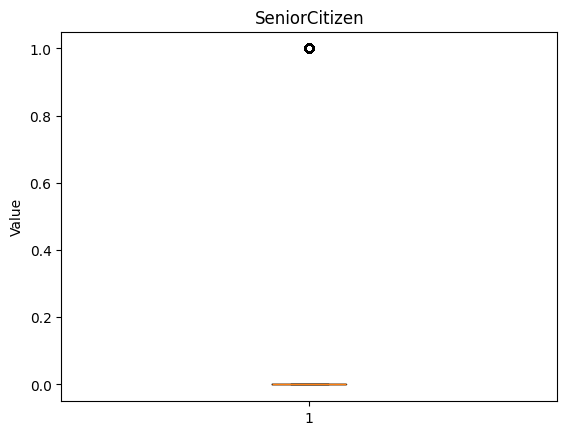

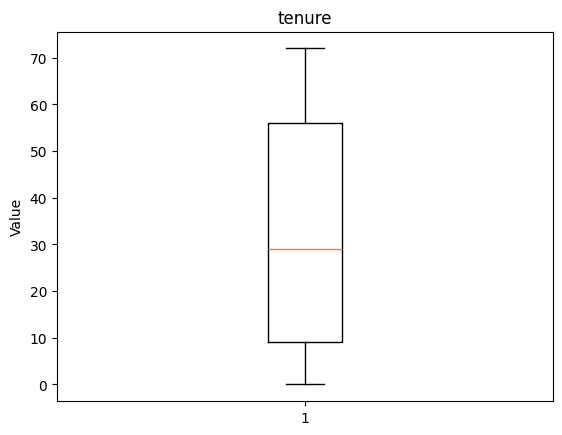

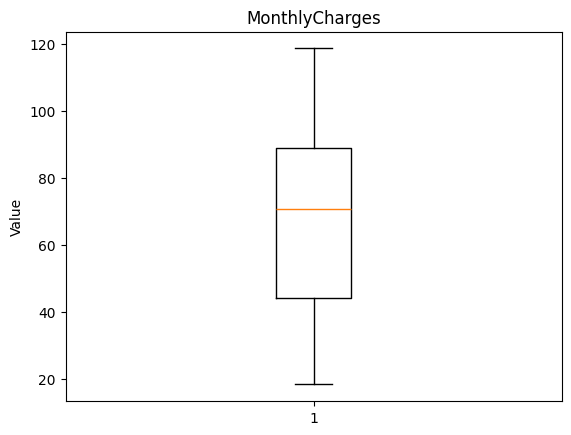

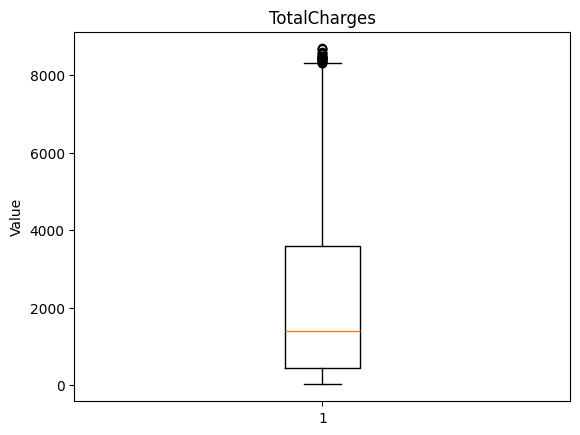

In [21]:
for i in df1.columns:
  if df1[i].dtype in ['int64', 'float64']:
    plt.figure()
    plt.boxplot(df1[i])
    plt.title(i)
    plt.ylabel('Value')
    plt.show()

In [22]:
q1 = np.quantile(df1['TotalCharges'],0.25)
q3 = np.quantile(df1['TotalCharges'],0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 +1.5*IQR
df1['TotalCharges'] = df1['TotalCharges'].clip(lower=lower_bound, upper =upper_bound)

Feature Engineering

In [23]:
#map Contract to numeric duration in months
contract_map = {"Month-to-month": 1, "One year": 12, "Two year": 24}
df1["ContractMonths"] = df1["Contract"].map(contract_map)
df1["Tenure_Contract"] = df1["tenure"] * df1["ContractMonths"]
df1 = df1.drop(columns = ['ContractMonths'],axis =1)

In [24]:
# Customer Lifetime Value = Tenure * MonthlyCharges
df1["CLV"] = df1["tenure"] * df1["MonthlyCharges"]

Encoding

In [25]:
en = LabelEncoder()
df1['gender'] = en.fit_transform(df1['gender'])
df1['Partner'] = en.fit_transform(df1['Partner'])
df1['Dependents'] = en.fit_transform(df1['Dependents'])
df1['PhoneService'] = en.fit_transform(df1['PhoneService'])
df1['Churn'] = en.fit_transform(df1['Churn'])
df1['PaperlessBilling'] = en.fit_transform(df1['PaperlessBilling'])

In [26]:
df1['OnlineBackup'].unique()

array(['No internet service', 'No', 'Yes'], dtype=object)

In [27]:
df_encoded = pd.get_dummies(df1, columns=['Contract', 'PaymentMethod', 'InternetService',
                                          'OnlineBackup','MultipleLines','OnlineSecurity',
                                          'DeviceProtection','TechSupport','StreamingTV',
                                          'StreamingMovies'], drop_first=True)


In [28]:
df_encoded.shape

(5634, 33)

In [29]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Tenure_Contract', 'CLV', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

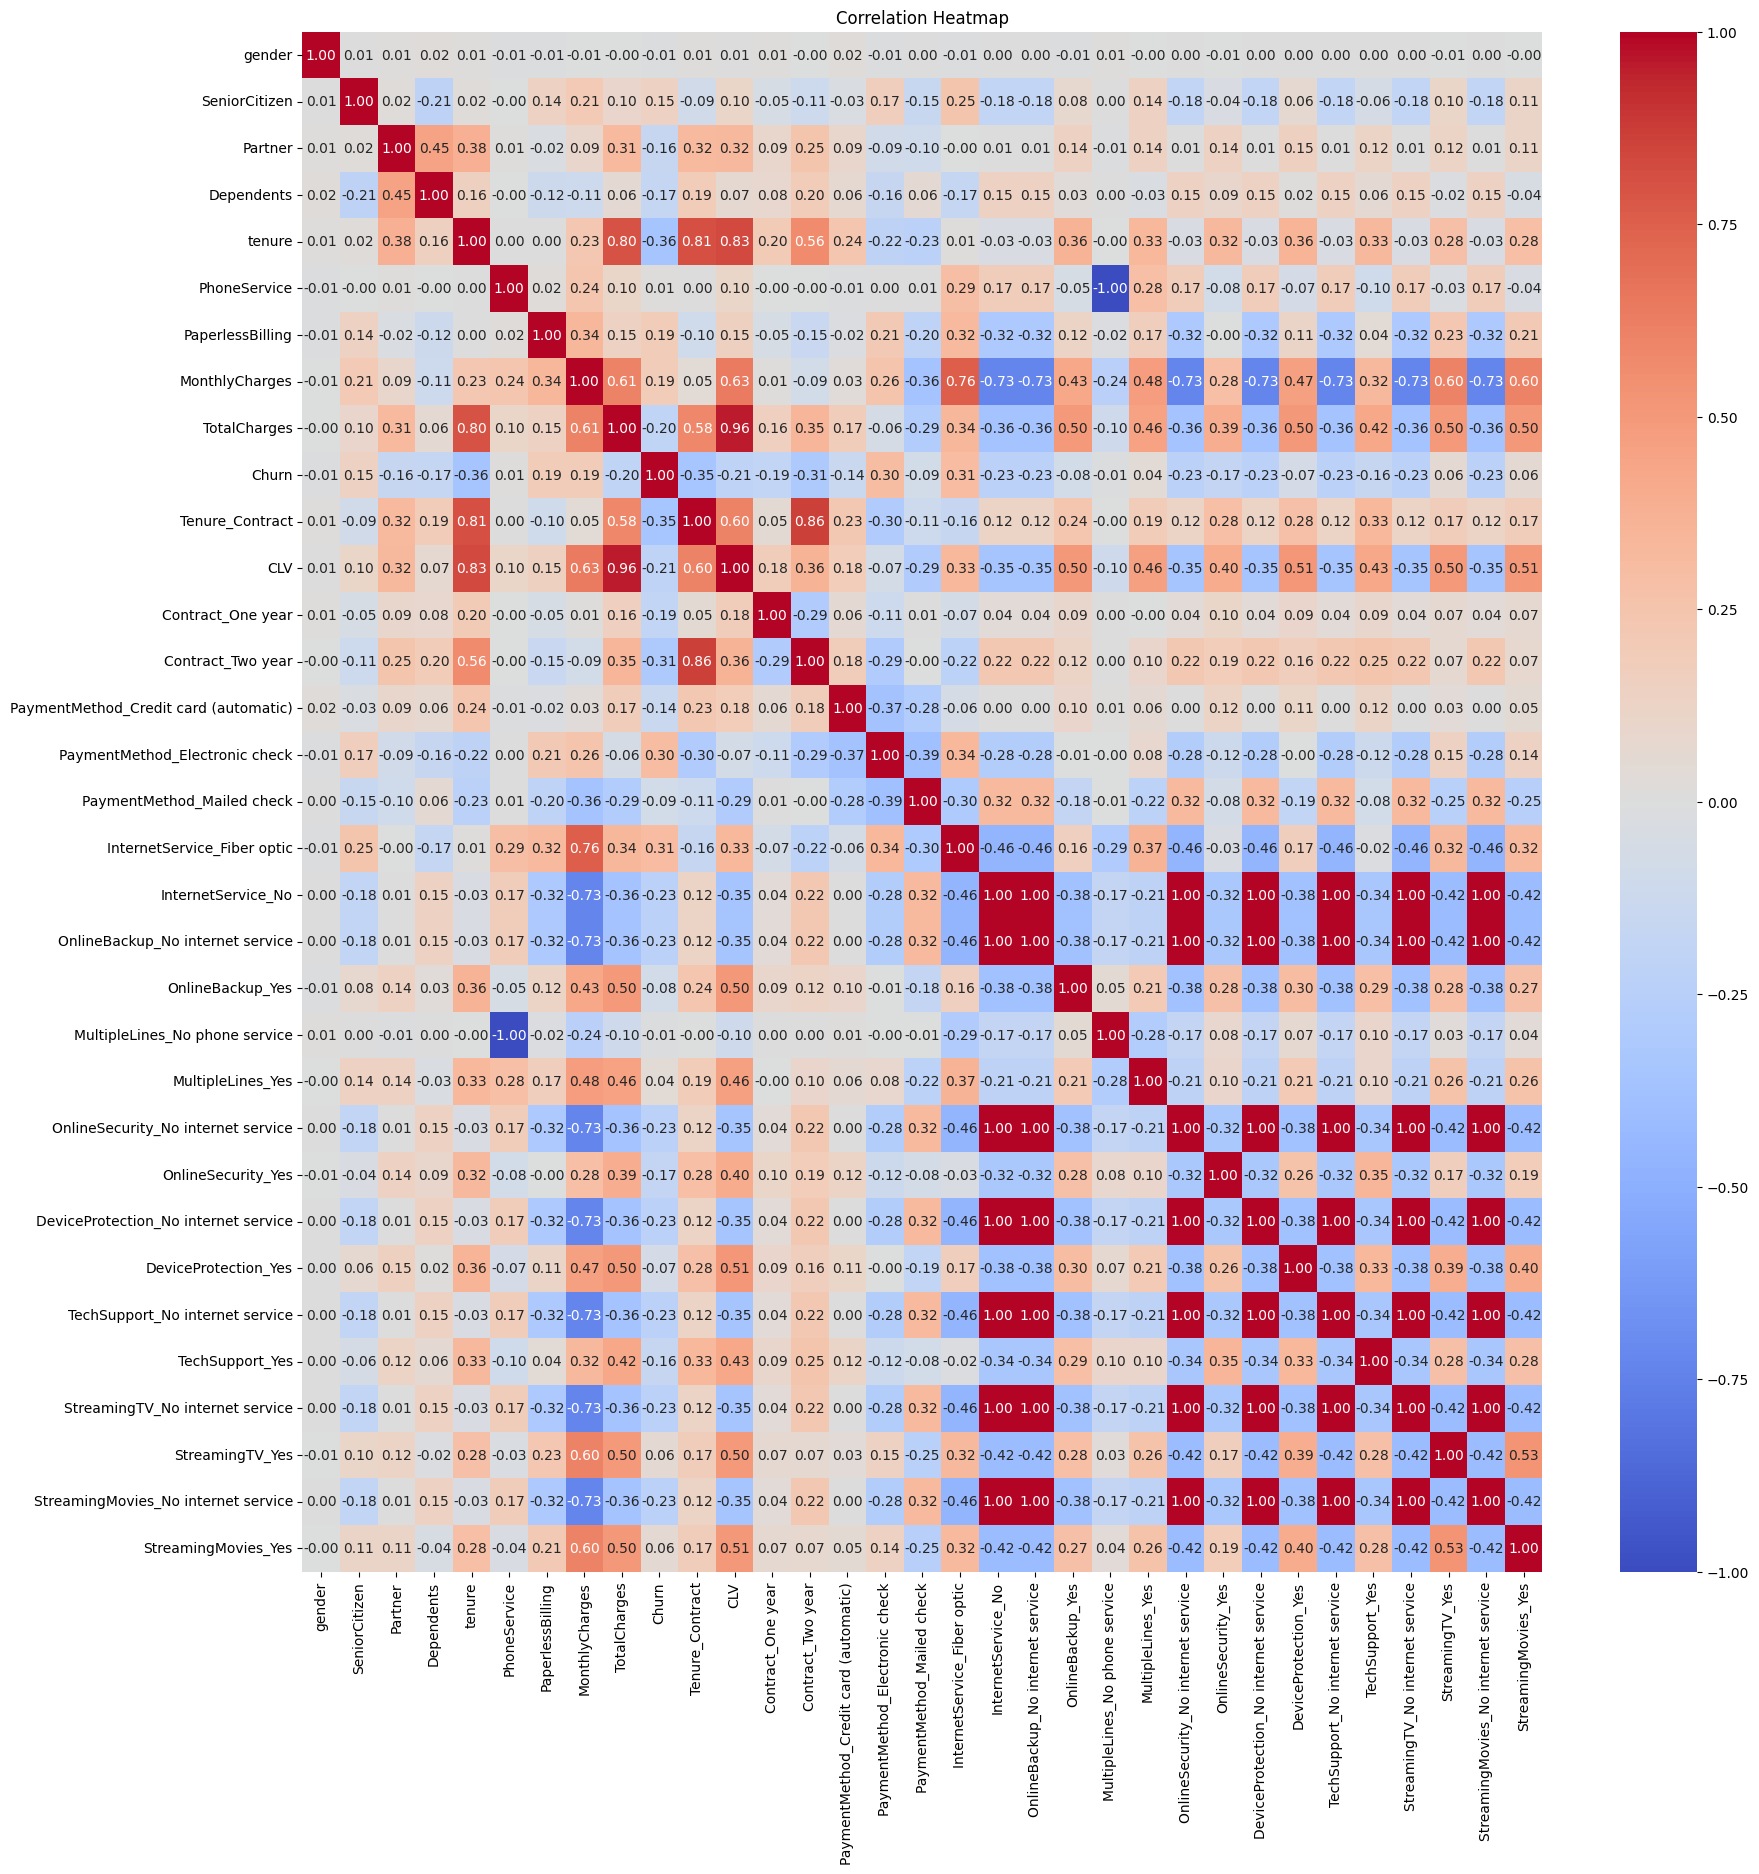

In [30]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

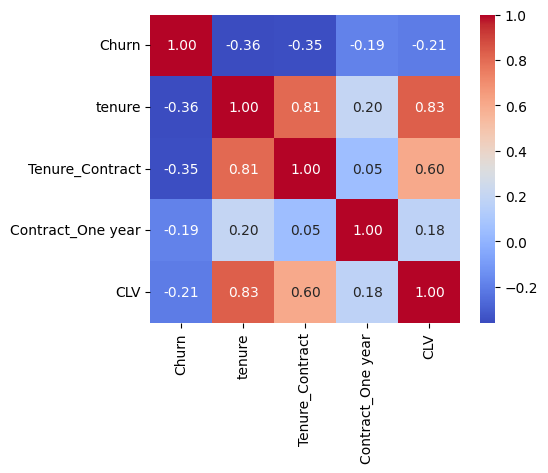

In [31]:
s = ['Churn','tenure','Tenure_Contract','Contract_One year','CLV']
corr_matrix = df_encoded[s].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [32]:
df_encoded = df_encoded.drop(columns=['tenure'],axis=1)# droping the column tenure which has high correlation with tenure contract and CLV

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'Partner'}>],
       [<Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'PhoneService'}>,
        <Axes: title={'center': 'PaperlessBilling'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>],
       [<Axes: title={'center': 'Tenure_Contract'}>,
        <Axes: title={'center': 'CLV'}>, <Axes: >]], dtype=object)

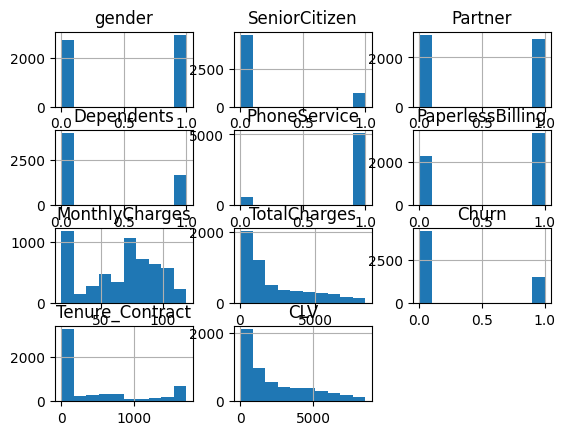

In [33]:
df_encoded.hist()

Scaling

In [34]:
y_train = df_encoded['Churn']
df3 = df_encoded.drop(columns = ['Churn'],axis=1)
x_train = df3

In [35]:
scaler = MinMaxScaler()
s = ['CLV','Tenure_Contract','MonthlyCharges','TotalCharges']
x_train[s] = scaler.fit_transform(x_train[s])

## Testing data preprocessing

In [36]:
df2.shape

(1409, 21)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [38]:
df2.duplicated().sum()

np.int64(0)

In [39]:
df2['TotalCharges'] = df2['TotalCharges'].replace(' ', np.nan)
df2['TotalCharges'] = df2['TotalCharges'].astype(np.float64)

In [40]:
df2.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [41]:
df2 = df2.drop(columns=['customerID'],axis=1)

In [42]:
df2['TotalCharges'] = df2['TotalCharges'].fillna(df2['TotalCharges'].median())

In [43]:
# Impute missing values in df2
"""for col in df2.columns:
  if df2[col].isnull().any():
    if df2[col].dtype == 'object':
      df2[col] = df2[col].fillna(df2[col].mode()[0])
    else:
      df2[col] = df2[col].fillna(df2[col].median())"""

"for col in df2.columns:\n  if df2[col].isnull().any():\n    if df2[col].dtype == 'object':\n      df2[col] = df2[col].fillna(df2[col].mode()[0])\n    else:\n      df2[col] = df2[col].fillna(df2[col].median())"

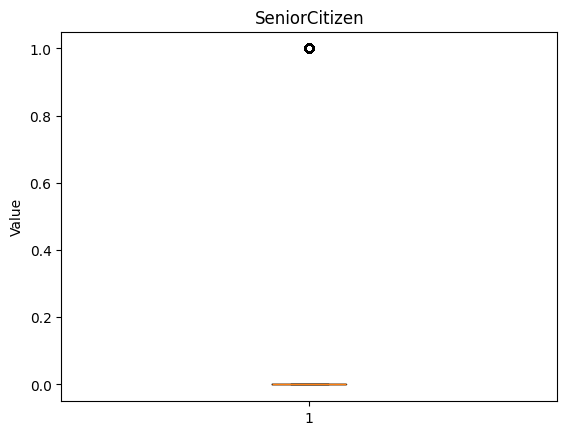

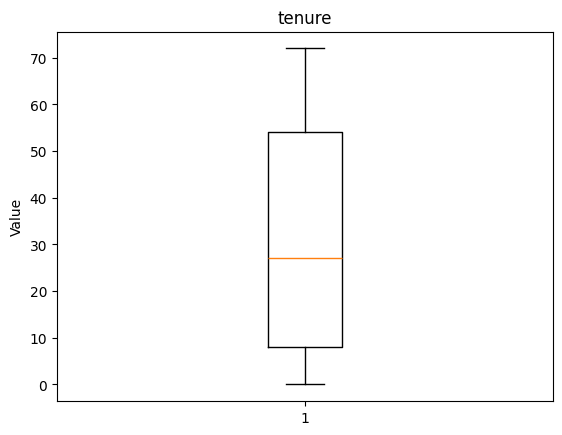

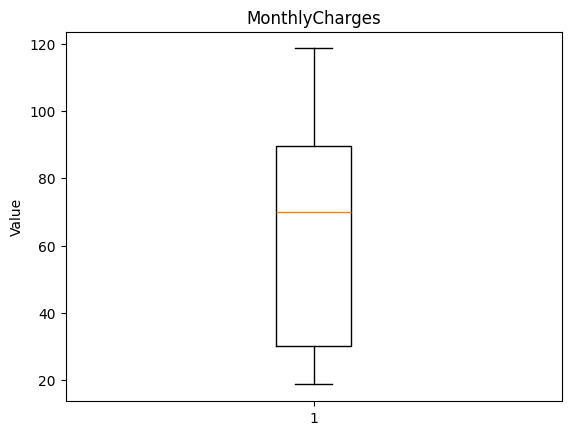

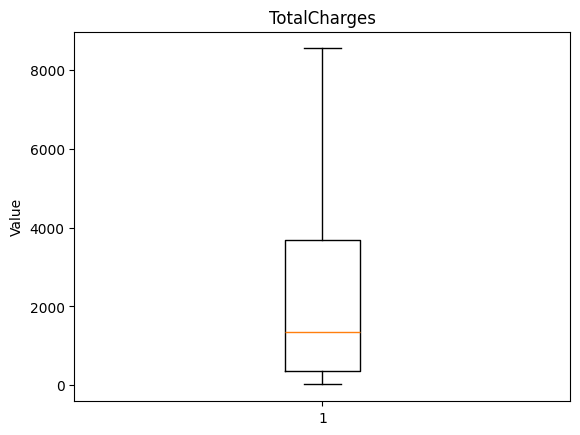

In [44]:
for i in df2.columns:
  if df2[i].dtype in ['int64', 'float64']:
    plt.figure()
    plt.boxplot(df2[i])
    plt.title(i)
    plt.ylabel('Value')
    plt.show()

In [45]:
#map Contract to numeric duration in months
contract_map = {"Month-to-month": 1, "One year": 12, "Two year": 24}
df2["ContractMonths"] = df2["Contract"].map(contract_map)
df2["Tenure_Contract"] = df2["tenure"] * df2["ContractMonths"]
df2 = df2.drop(columns = ['ContractMonths'],axis =1)

In [46]:
# Customer Lifetime Value = Tenure * MonthlyCharges
df2["CLV"] = df2["tenure"] * df2["MonthlyCharges"]

In [47]:
en = LabelEncoder()
df2['gender'] = en.fit_transform(df2['gender'])
df2['Partner'] = en.fit_transform(df2['Partner'])
df2['Dependents'] = en.fit_transform(df2['Dependents'])
df2['PhoneService'] = en.fit_transform(df2['PhoneService'])
df2['Churn'] = en.fit_transform(df2['Churn'])
df2['PaperlessBilling'] = en.fit_transform(df2['PaperlessBilling'])



In [48]:
df_encoded2 = pd.get_dummies(df2, columns=['Contract', 'PaymentMethod', 'InternetService',
                                           'OnlineBackup','MultipleLines','OnlineSecurity',
                                           'DeviceProtection','TechSupport','StreamingTV',
                                           'StreamingMovies'], drop_first=True)


In [49]:
df_encoded2 =df_encoded2.drop(columns='tenure',axis=1)

In [50]:
y_test = df_encoded2['Churn']
df3 = df_encoded2.drop(columns = ['Churn'],axis=1)
x_test = df3

In [51]:
scaler = MinMaxScaler()
s = ['CLV','Tenure_Contract','MonthlyCharges','TotalCharges']
x_test[s] = scaler.fit_transform(x_test[s])

## Logistic regression

In [52]:
x_test.shape

(1409, 31)

In [53]:
x_train.shape

(5634, 31)

In [115]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [116]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precission is',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is',recall_score(y_test,y_pred,average='weighted'))
print('f1 score ',f1_score(y_test,y_pred,average='weighted') )
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.8119233498935415
precission is 0.8032309523196332
Recall score is 0.8119233498935415
f1 score  0.8053439284172169
[[945  99]
 [166 199]]


## KNN

In [99]:
metric_k = []
neighbors = np.arange(3,30)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y2_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y2_pred)
  metric_k.append(acc)

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

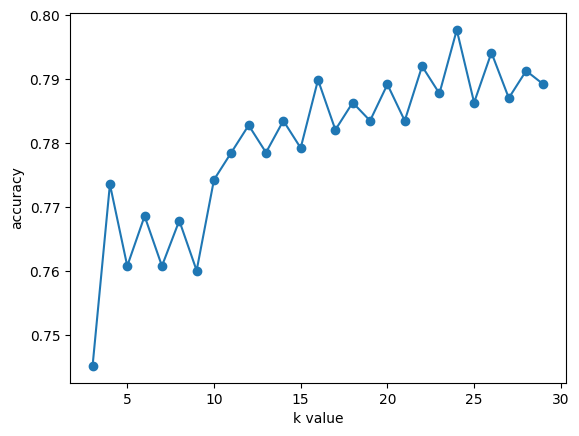

In [100]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid

In [113]:
classifier = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p=2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [114]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precission is',precision_score(y_test,y_pred,average = 'weighted'))
print('Recall score is',recall_score(y_test,y_pred, average = 'weighted'))
print('f1 score ',f1_score(y_test,y_pred, average = 'weighted') )
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.7977288857345636
precission is 0.7892863793452527
Recall score is 0.7977288857345636
f1 score  0.7920838502993682
[[929 115]
 [170 195]]


## decision tree

Accuracy: 0.7913413768630234
Confusion Matrix:
 [[980  64]
 [230 135]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1044
           1       0.68      0.37      0.48       365

    accuracy                           0.79      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.78      0.79      0.77      1409



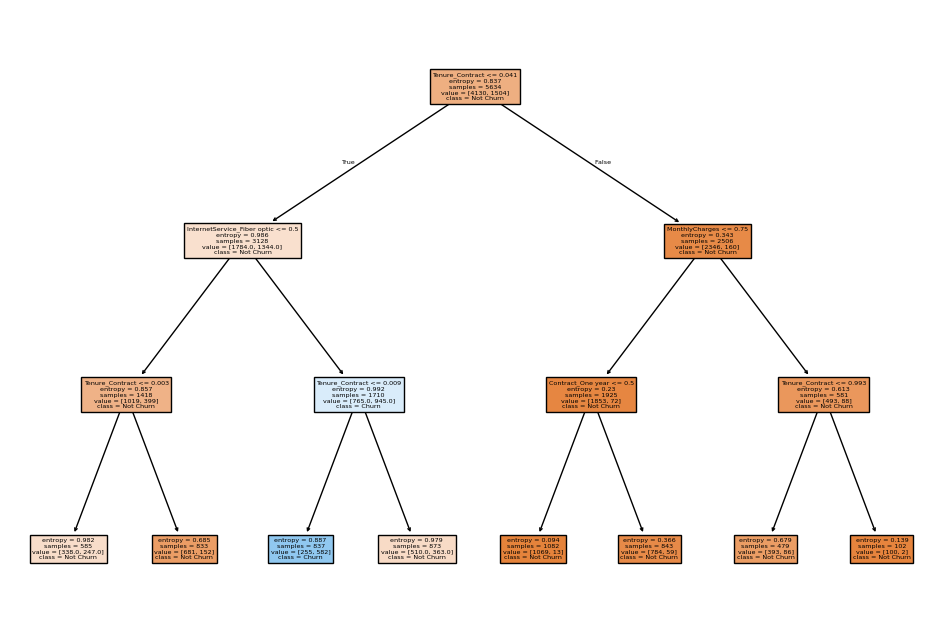

In [106]:
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=x_train.columns, class_names=['Not Churn', 'Churn'], filled=True)
plt.show()

In [107]:
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Precision:  0.7758458370013468
Recall:  0.7913413768630234
f1 score:  0.7683180479132103


### Hyper parameter tuning using gridsearchcv

In [79]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3,5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid Search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(x_train, y_train)

print("Best parameters (Decision Tree):", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Evaluate on test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score: 0.793043352177538
Test Accuracy: 0.7842441447835344

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1044
           1       0.58      0.60      0.59       365

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.79      0.78      0.79      1409



Hyperparameter tuning using GridSearchCV method did not improve the model.


## Random Forest

In [62]:
rf = RandomForestClassifier( n_estimators=100,       # Number of trees
    criterion='gini',       # Splitting criterion
    max_features='sqrt',    # Number of features per split
    bootstrap=True,         # Use bootstrapped samples
    random_state=42         # For reproducibility
)

In [63]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [64]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7913413768630234
Precision:  0.7758458370013468
Recall:  0.7913413768630234
f1 score:  0.7683180479132103


/tmp/ipython-input-4231135899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(20), y=importances.head(20).index, palette="viridis")


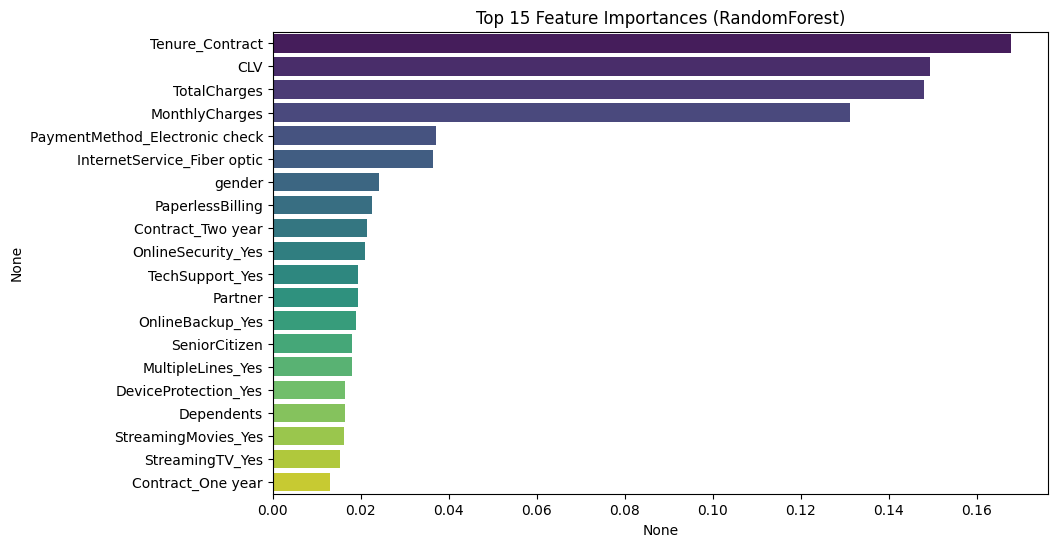

In [65]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x=importances.head(20), y=importances.head(20).index, palette="viridis")
plt.title("Top 15 Feature Importances (RandomForest)")
plt.show()

In [66]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Tenure_Contract',
       'CLV', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [67]:
s = ['Tenure_Contract','CLV','TotalCharges','MonthlyCharges','PaymentMethod_Electronic check','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check','InternetService_Fiber optic', 'InternetService_No']
x1_train = x_train[s]


In [68]:
rf.fit(x1_train,y_train)

RandomForestClassifier(random_state=42)

In [69]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7913413768630234
Precision:  0.7758458370013468
Recall:  0.7913413768630234
f1 score:  0.7683180479132103


selecting specific features through checking feature importance of random forest could not chang accuracy

### RandomSearchCV

In [101]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(50, 2000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,           # number of random combinations to try
    cv=5,
    n_jobs=-1,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(x_train, y_train)

print("Best parameters (RandomizedSearch):", random_search.best_params_)
print("Best CV Score (RandomizedSearch):", random_search.best_score_)


Best parameters (RandomizedSearch): {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 13, 'n_estimators': 237}
Best CV Score (RandomizedSearch): 0.8020955049716234


In [102]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8069552874378992

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1044
           1       0.66      0.52      0.58       365

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



fixing n_estimater range 2000 to 2600

In [103]:
param_dist = {
    'n_estimators': randint(2000, 2600),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,           # number of random combinations to try
    cv=5,
    n_jobs=-1,9
    random_state=42,
    scoring='accuracy'
)

random_search.fit(x_train, y_train)

print("Best parameters (RandomizedSearch):", random_search.best_params_)
print("Best CV Score (RandomizedSearch):", random_search.best_score_)


Best parameters (RandomizedSearch): {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 2560}
Best CV Score (RandomizedSearch): 0.8010299432152195


In [108]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8112136266855926

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1044
           1       0.67      0.53      0.59       365

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [110]:
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Precision:  0.8018735734577264
Recall:  0.8112136266855926
f1 score:  0.8037964639031183


In [111]:
print(confusion_matrix(y_test,y_pred))

[[948  96]
 [170 195]]


Using RandomizedSearchCV, the best Random Forest model was found with n_estimators = 2560, achieving an accuracy of 0.8112. This is slightly higher than the accuracy at n_estimators = 236 (0.8069), but still marginally lower than the Logistic Regression model, which achieved the highest accuracy of 0.8119

The most suitable model for churn prediction is Logistic Regression, followed by Random Forest, KNN, and Decision Tree. Logistic Regression outperformed the other models in terms of accuracy, precision, recall, and F1-score. Based on these insights, the company should focus on offering attractive discounts and improving internet speed in order to retain customers.